# Desqueeze VDM optics for IR8

In [1]:
# lhcoptics is installed within pip

from lhcoptics import LHCOptics
from lhcoptics import LHCCircuits



In [2]:
vdm_inj_optics = LHCOptics.from_json("data/opt_inj2025.json")
vdm_inj_optics

<LHCOptics '000_vdm_model.madx'>

In [3]:
vdm_inj_optics.ir1.strengths

{'kqx.l1': -0.00854562504357,
 'kqx.r1': 0.00854562504357,
 'ktqx1.l1': 0.0,
 'ktqx1.r1': 0.0,
 'ktqx2.l1': 0.0,
 'ktqx2.r1': 0.0,
 'kq4.l1b1': 0.00532939746961,
 'kq4.l1b2': -0.0048071217043,
 'kq4.r1b1': -0.00532939746961,
 'kq4.r1b2': 0.0048071217043,
 'kq5.l1b1': -0.00549310859055,
 'kq5.l1b2': 0.00509850806769,
 'kq5.r1b1': 0.00549310859055,
 'kq5.r1b2': -0.00509850806769,
 'kq6.l1b1': 0.00499494557346,
 'kq6.l1b2': -0.00501561197551,
 'kq6.r1b1': -0.00499494557346,
 'kq6.r1b2': 0.00501561197551,
 'kq7.l1b1': -0.00456683783331,
 'kq7.l1b2': 0.00477695999326,
 'kq7.r1b1': 0.00448901787695,
 'kq7.r1b2': -0.00472762660695,
 'kq8.l1b1': 0.00732209287546,
 'kq8.l1b2': -0.00710402639207,
 'kq8.r1b1': -0.0073378487362,
 'kq8.r1b2': 0.00709847080621,
 'kq9.l1b1': -0.0068055907953,
 'kq9.l1b2': 0.00709604793831,
 'kq9.r1b1': 0.00686826741479,
 'kq9.r1b2': -0.00712819245801,
 'kq10.l1b1': 0.00723117774947,
 'kq10.l1b2': -0.00733748351116,
 'kq10.r1b1': -0.00717547782475,
 'kq10.r1b2': 0.007

In [4]:
vdm_inj_optics.ir1.knob_names

['on_x1_h',
 'on_sep1_h',
 'on_x1_v',
 'on_sep1_v',
 'on_xip1b1',
 'on_xip1b2',
 'on_oh1',
 'on_yip1b2',
 'on_yip1b1',
 'on_ov1']

In [5]:
vdm_inj_optics.set_xsuite_model("data/lhc.json")
twb1, twb2 = vdm_inj_optics.twiss()

Loading line from dict:   0%|          | 0/28953 [00:00<?, ?it/s]

Done loading line from dict.           


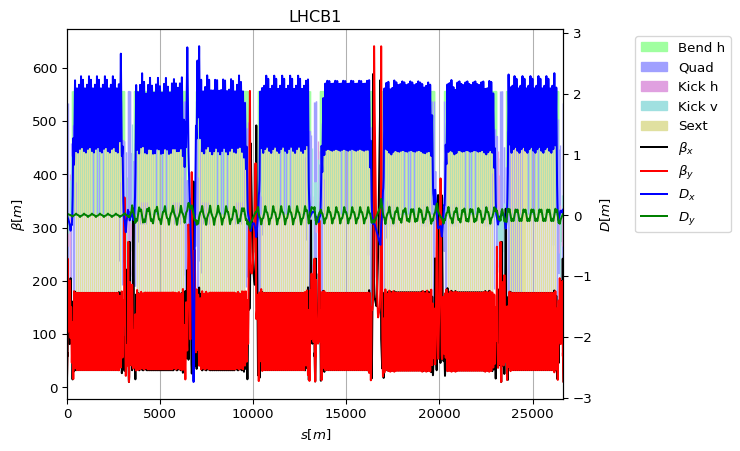

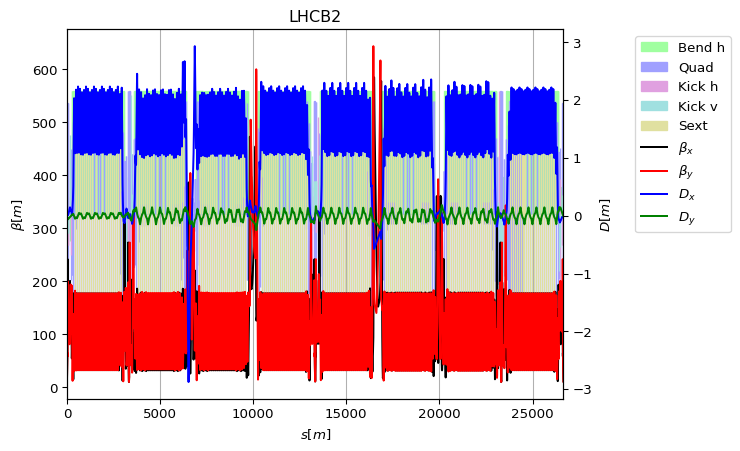

In [6]:
vdm_inj_optics.plot()

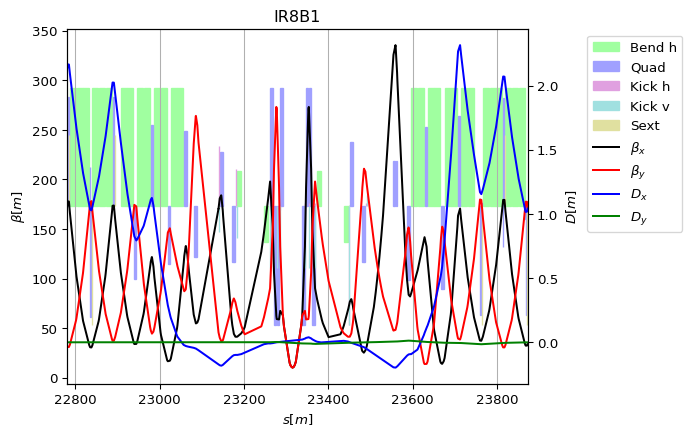

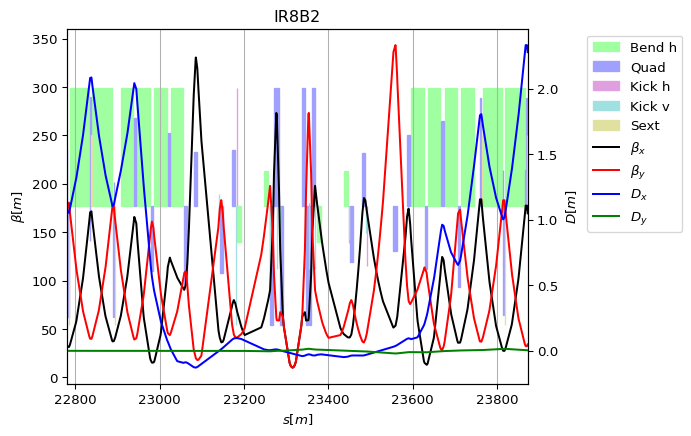

In [7]:
vdm_inj_optics.ir8.plot()

In [8]:
vdm_inj_optics.ir1.knobs

{'on_oh1': <IPKnob 'on_oh1' = 0.0>, 'on_ov1': <IPKnob 'on_ov1' = 0.0>}

## Create collision optics  

In [9]:

from cpymad.madx import Madx

mymad = Madx()

mymad.input(f'''
    call, file="acc-models-lhc/lhc.seq";

    beam, sequence=lhcb1, bv= 1, particle=proton, charge=1, mass=0.938272046,
    pc= 450.0,   npart=1.2e11,kbunch=2556, ex=5.2126224777777785e-09,ey=5.2126224777777785e-09;
    beam, sequence=lhcb2, bv=-1, particle=proton, charge=1, mass=0.938272046,
    pc= 450.0,   npart=1.2e11,kbunch=2556, ex=5.2126224777777785e-09,ey=5.2126224777777785e-09;

    call,file="/afs/cern.ch/work/e/efthymio/public/vdm_optics/vdm2025/opticsfile_2025.11";

    on_x8h := -300;
    call,file="acc-models-lhc/aperture/aperture.b1.madx";
    call,file="acc-models-lhc/aperture/aperture.b2.madx";
    call,file="acc-models-lhc/aperture/aper_tol.b1.madx";
    call,file="acc-models-lhc/aperture/aper_tol.b2.madx";
    use,sequence=lhcb1;
    use,sequence=lhcb2;
    ''')

mymad.twiss()


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.09.03  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2024.04.25               +
  + Execution date: 2025.04.25 11:43:36      +
  ++++++++++++++++++++++++++++++++++++++++++++


  /**********************************************************************************

  *

  * LHC ring (draft) version EYETS 2024-2025 in MAD X sequence format

  * Generated the 21-DEC-2024 02:58:59 from LAYOUT

  * R. De Maria: modified roundings

  *

  ***********************************************************************************/





/************************************************************************************/

/*                       GEOMETRY                                                   */

/************************************************************************************/



if (version>=50401){option,-rbarc;};



LHCLENGTH           := 26658.8832;

sep_ARC             := 0

<Table 'twiss': {name, keyword, s, betx, alfx, mux, bety, alfy, muy, x, px, y, py, t, pt, dx, dpx, dy, dpy, wx, phix, dmux, wy, phiy, dmuy, ddx, ddpx, ddy, ddpy, r11, r12, r21, r22, energy, l, angle, k0l, k0sl, k1l, k1sl, k2l, k2sl, k3l, k3sl, k4l, k4sl, k5l, k5sl, k6l, k6sl, k7l, k7sl, k8l, k8sl, k9l, k9sl, k10l, k10sl, k11l, k11sl, k12l, k12sl, k13l, k13sl, k14l, k14sl, k15l, k15sl, k16l, k16sl, k17l, k17sl, k18l, k18sl, k19l, k19sl, k20l, k20sl, ksi, hkick, vkick, tilt, e1, e2, h1, h2, hgap, fint, fintx, volt, lag, freq, harmon, slot_id, assembly_id, mech_sep, v_pos, bbcharge, xma, yma, sigx, sigy, lrad, parent, comments, re11, re12, re13, re14, re15, re16, re21, re22, re23, re24, re25, re26, re31, re32, re33, re34, re35, re36, re41, re42, re43, re44, re45, re46, re51, re52, re53, re54, re55, re56, re61, re62, re63, re64, re65, re66, kmax, kmin, calib, polarity, alfa, beta11, beta12, beta13, beta21, beta22, beta23, beta31, beta32, beta33, alfa11, alfa12, alfa13, alfa21, alfa22, alfa

In [10]:
vdm_col_opt = LHCOptics.from_madx(mymad)

++++++ info: dqx.b1_sq redefined
++++++ info: dqx.b1_sq redefined
++++++ info: dqx.b1 redefined
++++++ info: dqx.b1 redefined
++++++ info: dqx.b2_sq redefined
++++++ info: dqx.b2_sq redefined
++++++ info: dqx.b2 redefined
++++++ info: dqx.b2 redefined
++++++ info: dqy.b1_sq redefined
++++++ info: dqy.b1_sq redefined
++++++ info: dqy.b1 redefined
++++++ info: dqy.b1 redefined
++++++ info: dqy.b2_sq redefined
++++++ info: dqy.b2_sq redefined
++++++ info: dqy.b2 redefined
++++++ info: dqy.b2 redefined
++++++ info: dqpx.b1_sq redefined
++++++ info: dqpx.b1_sq redefined
++++++ info: dqpx.b1 redefined
++++++ info: dqpx.b1 redefined
++++++ info: dqpx.b2_sq redefined
++++++ info: dqpx.b2_sq redefined
++++++ info: dqpx.b2 redefined
++++++ info: dqpx.b2 redefined
++++++ info: dqpy.b1_sq redefined
++++++ info: dqpy.b1_sq redefined
++++++ info: dqpy.b1 redefined
++++++ info: dqpy.b1 redefined
++++++ info: dqpy.b2_sq redefined
++++++ info: dqpy.b2_sq redefined
++++++ info: dqpy.b2 redefined
++++++ 

In [11]:
vdm_col_opt.ir2.knobs

{'on_a2': <Knob 'on_a2' = 40.0>,
 'on_oh2': <Knob 'on_oh2' = 0.0>,
 'on_ov2': <Knob 'on_ov2' = 0.0>,
 'on_sep2h': <Knob 'on_sep2h' = -3.5>,
 'on_sep2v': <Knob 'on_sep2v' = 0.0>,
 'on_x2h': <Knob 'on_x2h' = 0.0>,
 'on_x2v': <Knob 'on_x2v' = 170.0>}

In [12]:
vdm_col_opt.ir8.knobs

{'on_x8h': <Knob 'on_x8h' = -300.0>,
 'on_sep8h': <Knob 'on_sep8h' = 0.0>,
 'on_x8v': <Knob 'on_x8v' = 0.0>,
 'on_sep8v': <Knob 'on_sep8v' = -3.5>,
 'on_o8': <Knob 'on_o8' = 0.0>,
 'on_oh8': <Knob 'on_oh8' = 0.0>,
 'on_a8': <Knob 'on_a8' = -40.0>,
 'on_ov8': <Knob 'on_ov8' = 0.0>}

Loading line from dict:   0%|          | 0/28953 [00:00<?, ?it/s]

Done loading line from dict.           


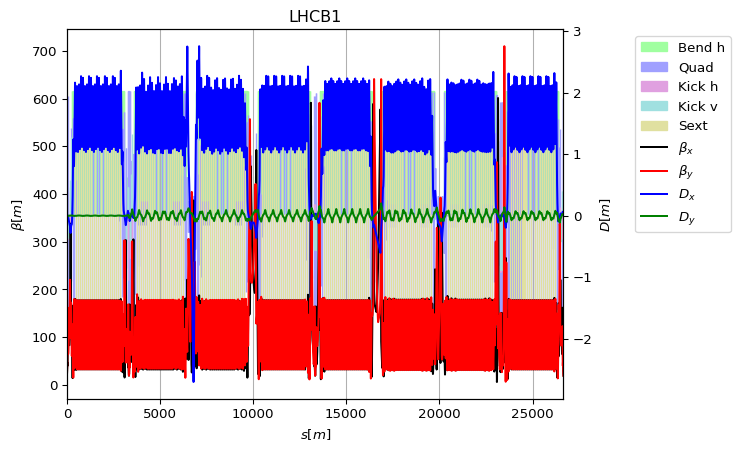

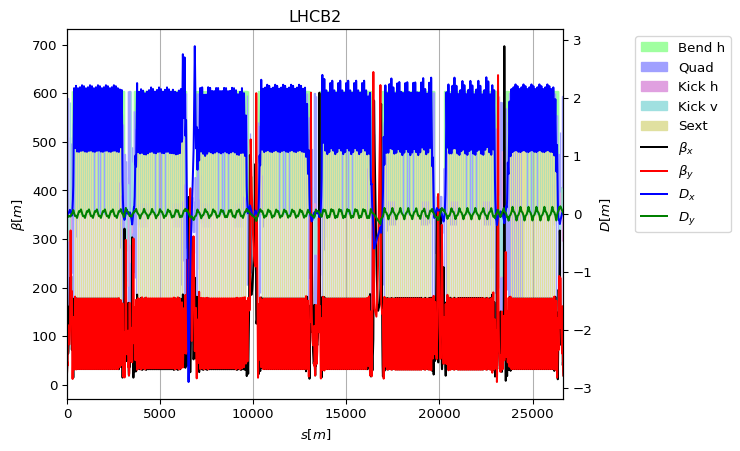

In [13]:
# vdm_col_opt.set_xsuite_model("acc-models-lhc/xsuite/lhc.json")
vdm_col_opt.set_xsuite_model("acc-models-lhc/xsuite/lhc.json")

twcol1, twcol2 = vdm_col_opt.twiss()
vdm_col_opt.plot()

In [14]:
vdm_col_opt.check()

name    betx    bety      dx     dpx  px*1e6   py*1e6   x*1e3   y*1e3
ip1  19.2000 19.2000  0.0290 -0.0005 -0.0000 170.0000 -2.0000 -0.0000
ip1  19.2000 19.2000  0.0123 -0.0003 -0.0000 -170.0000  2.0000 -0.0000
ip2  19.2000 19.2000  0.0015 -0.0018 40.0000 170.0000 -3.5000 -0.0000
ip2  19.2000 19.2000  0.0117  0.0004 40.0000 -170.0000  3.5000 -0.0000
ip5  19.2000 19.2000  0.0251  0.0001 170.0000 -0.0000 -0.0000 -2.0000
ip5  19.2000 19.2000  0.0275  0.0002 -170.0000 -0.0000  0.0000  2.0000
ip8  50.0000 50.0000  0.0077 -0.0001 -300.0000 -40.0000  0.0000 -3.5000
ip8  50.0000 50.0000  0.0199  0.0001 300.0000 -40.0000  0.0000  3.5000
         HB1         HB2         VB1         VB2
Tunes:    62.310000   62.310000   60.320000   60.320000
Chroma:   -0.029088   -0.050214   -0.047085   -0.015104


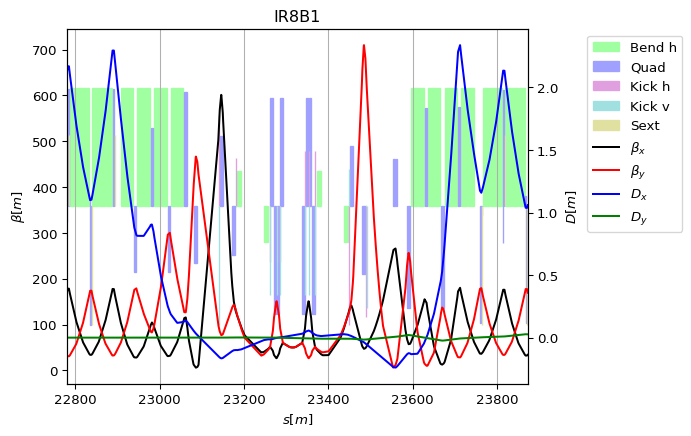

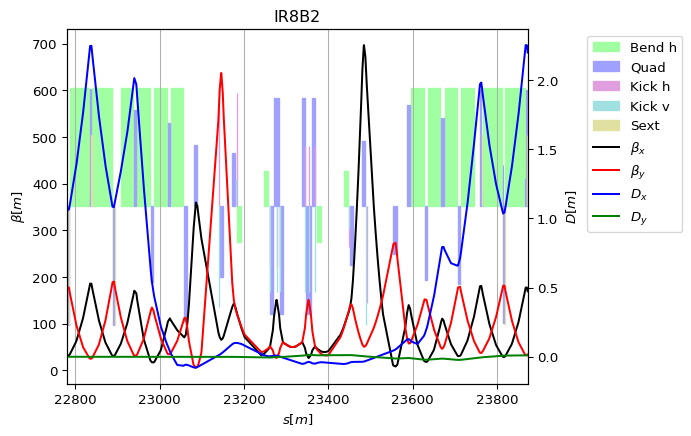

In [15]:
vdm_col_opt.ir8.plot()

In [16]:
vdm_col_opt.ir8.knobs

{'on_x8h': <Knob 'on_x8h' = -300.0>,
 'on_sep8h': <Knob 'on_sep8h' = 0.0>,
 'on_x8v': <Knob 'on_x8v' = 0.0>,
 'on_sep8v': <Knob 'on_sep8v' = -3.5>,
 'on_o8': <Knob 'on_o8' = 0.0>,
 'on_oh8': <Knob 'on_oh8' = 0.0>,
 'on_a8': <Knob 'on_a8' = -40.0>,
 'on_ov8': <Knob 'on_ov8' = 0.0>}

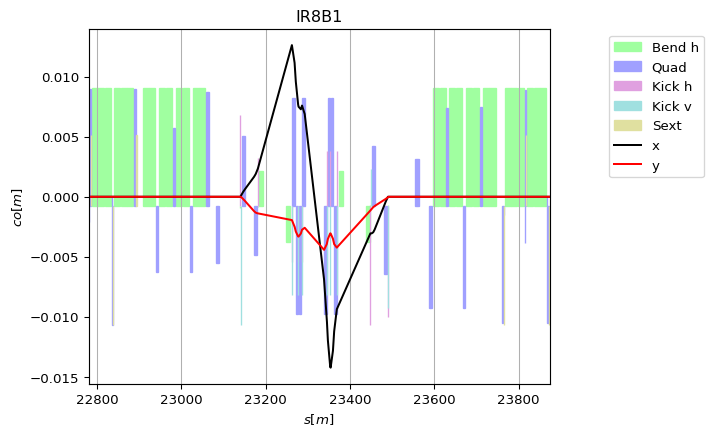

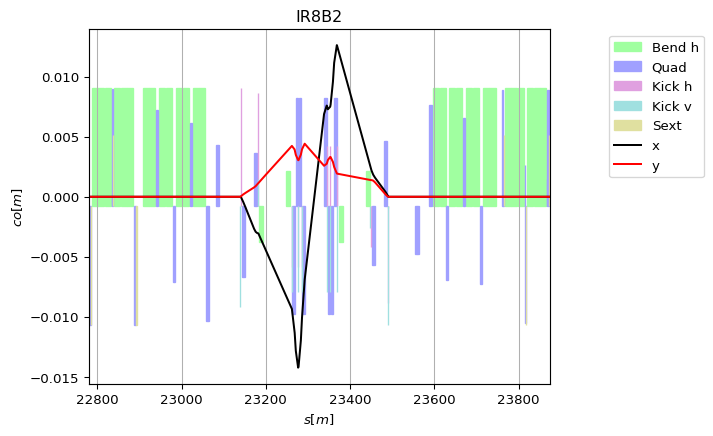

In [17]:
vdm_col_opt.ir8.plot(yl='x y')

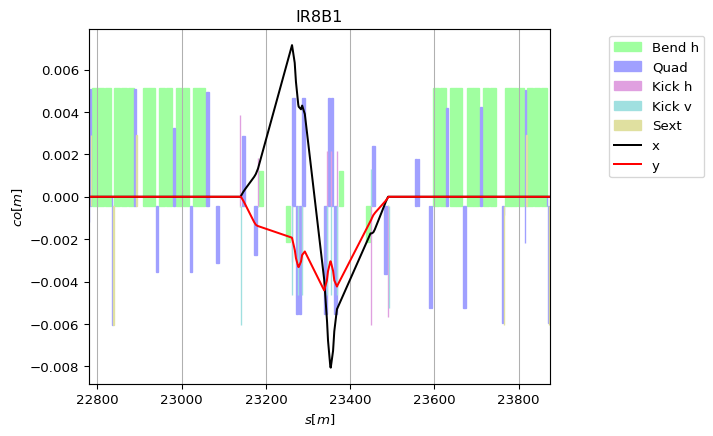

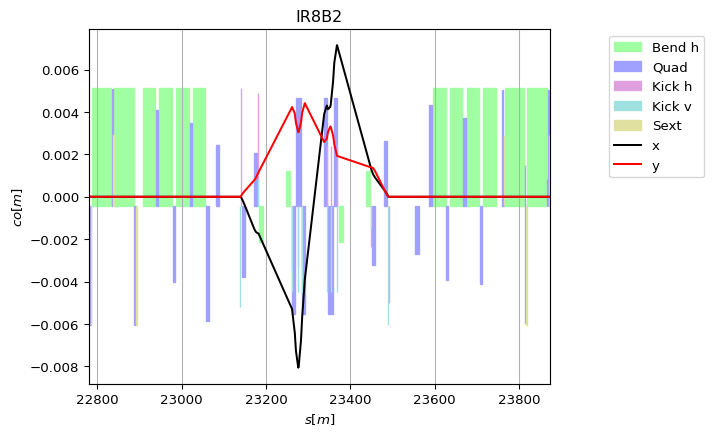

In [19]:
vdm_col_opt.model['on_x8h'] = -170
vdm_col_opt.ir8.plot(yl='x y')

In [21]:
vdm_col_opt.update()
vdm_col_opt.ir8.knobs

{'on_x8h': <IPKnob 'on_x8h' = -170>,
 'on_sep8h': <IPKnob 'on_sep8h' = 0.0>,
 'on_x8v': <IPKnob 'on_x8v' = 0.0>,
 'on_sep8v': <IPKnob 'on_sep8v' = -3.5>,
 'on_o8': <IPKnob 'on_o8' = 0.0>,
 'on_oh8': <IPKnob 'on_oh8' = 0.0>,
 'on_a8': <IPKnob 'on_a8' = -40.0>,
 'on_ov8': <IPKnob 'on_ov8' = 0.0>}

In [ ]:
vdm_col_opt.set_circuits("data/lhccircuits.json")
vdm_col_opt.circuits

In [ ]:
vdm_col_opt.ir8.strengths

In [ ]:
cir=vdm_col_opt.circuits.madname["acbxh1.l8"]
print(cir.get_current(vdm_col_opt.ir8.strengths['acbxh1.l8']))

In [ ]:
vdm_col_opt.ir8.update_strengths()

In [ ]:
vdm_col_opt.ir8.knobs

In [ ]:
vdm_col_opt.ir8.strengths